In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Q1.A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Assumptions:
1. Both samples are independent
2. Check for normality
3. Check for equal variances

State the null and alternative hypotheses:

Null Hypothesis (H0): There is no significant difference in the diameter of cutlets between Unit A and Unit B.

Alternative Hypothesis (Ha): There is a significant difference in the diameter of cutlets between Unit A and Unit B.

In [2]:
df = pd.read_csv('Cutlets.csv')

In [3]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [5]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


Assumption 1:

Both samples are independent: The samples are independent of each other, i.e., they originate from two separate units. In this case, they are collected from Unit A and Unit B.

Assumptions-2

Normality: The data in each sample follows a roughly normal distribution.

Check for normality we can visually inspect using histograms, Q-Q Plot.

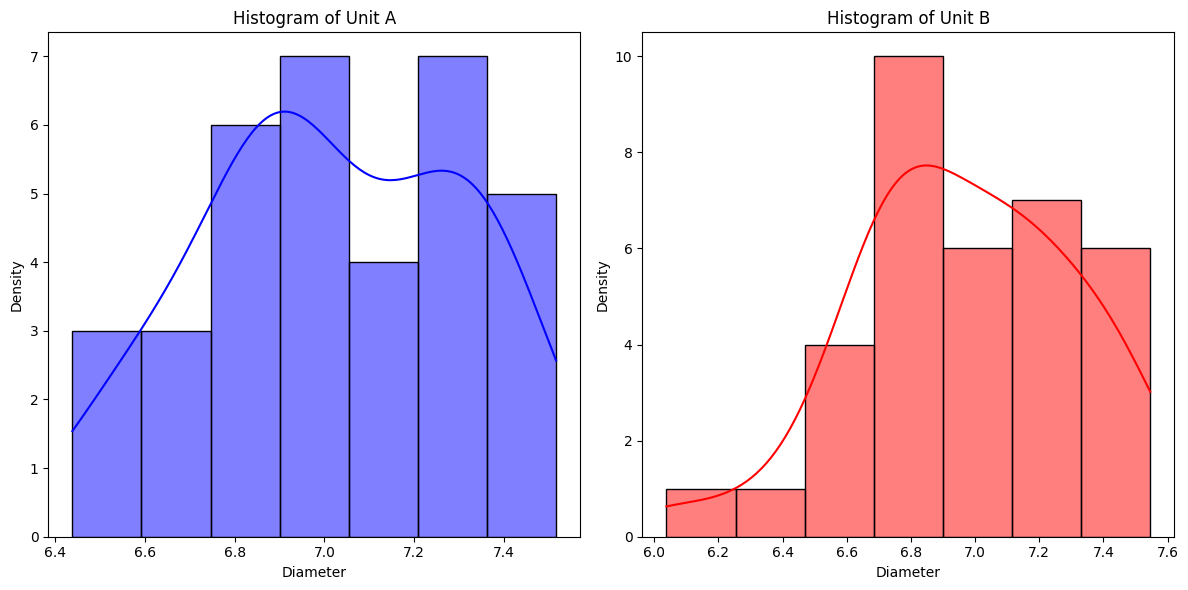

In [6]:
# Create histograms for Unit A and Unit B
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Unit A'], kde=True, color='b', label='Unit A')
plt.title('Histogram of Unit A')
plt.xlabel('Diameter')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(df['Unit B'], kde=True, color='r', label='Unit B')
plt.title('Histogram of Unit B')
plt.xlabel('Diameter')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


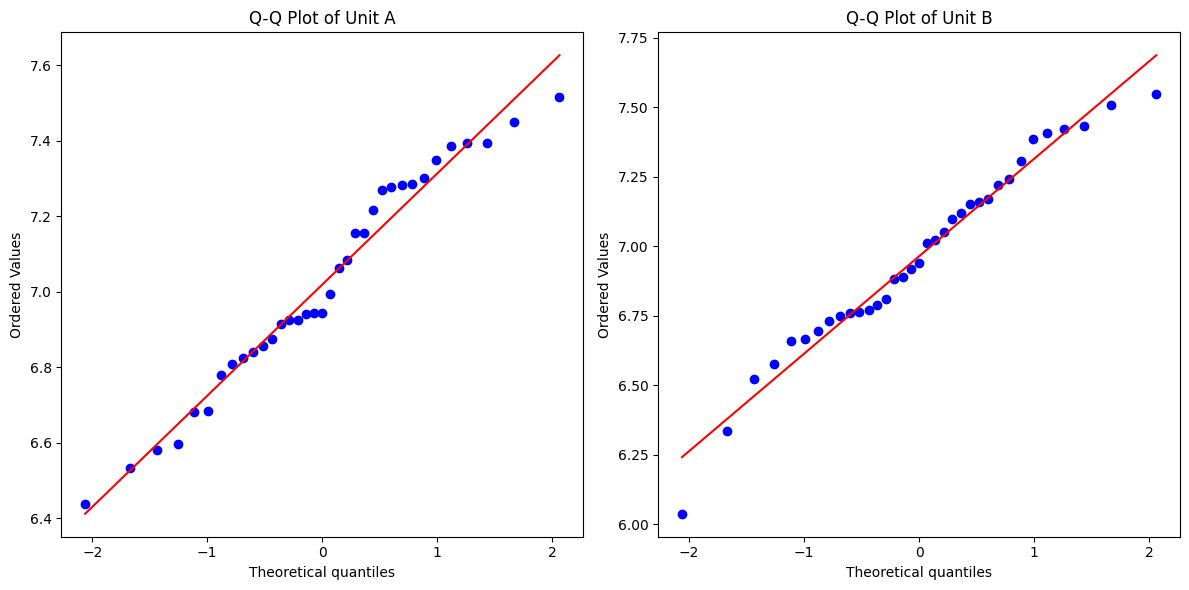

In [7]:
# Create Q-Q plots for Unit A and Unit B
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['Unit A'], plot=plt)
plt.title('Q-Q Plot of Unit A')

plt.subplot(1, 2, 2)
stats.probplot(df['Unit B'], plot=plt)
plt.title('Q-Q Plot of Unit B')

plt.tight_layout()
plt.show()


Assumptions-3

Check for equal variances (Levene's test): If the variances of the data in the two samples are approximately equal.

In [9]:
# Extract the data for Unit A and Unit B
unit_a = df['Unit A']
unit_b = df['Unit B']

# Check for equal variances (Levene's test).
_, p_value_equal_var = stats.levene(unit_a, unit_b)

# Perform the t-test assuming equal variances
t_stat, p_value = stats.ttest_ind(unit_a, unit_b)

# Set the significance level
alpha = 0.05

# Print the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value (assuming equal variances): {p_value}")
print()

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in cutlet diameter between Unit A and Unit B.")
else:
    print("Answer(Q1):Fail to reject the null hypothesis. There is no significant difference in cutlet diameter between Unit A and Unit B.")


T-Statistic: 0.7228688704678063
P-Value (assuming equal variances): 0.47223947245995

Answer(Q1):Fail to reject the null hypothesis. There is no significant difference in cutlet diameter between Unit A and Unit B.
